# Experiment Instructions & Summary

In [5]:
# Function file import
import functionfile_speedygreedy as ff

### Instructions to create and run experiments

Experiment parameters are created in experiment_parameters.csv opened as an Excel sheet
Parameters:
- *experiment_no* : Ensure that every new row has a new number to prevent data overwrites
- *test_model* and *test_parameter*: These define the experiment model and control parameter

| Exp No | test_model                          | Test Description                                                                                                                              | test_parameter Effect                                     |
|:------:|:-----------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------|
|  1.1   | fixed_vs_selftuning                      | compare fixed architecture to self-tuning architecture for a generated network                                                                | number of changes permitted for self_tuning architecture |
|  1.2   | statistics_fixed_vs_selftuning           | run fixed_vs_selftuning for 100 different randomly generated network graphs                                                                   | number of changes permitted for self_tuning architecture |
|  1.3   | statistics_pointdistribution_openloop    | run fixed_vs_selftuning over initial points on eigenvectors of open-loop dynamics matrix of a single instance of a randomly generated network | number of changes permitted for self_tuning architecture |
|  2.1   | selftuning_number_of_changes             | compare the effect of 1 vs $n$ number of architecture optimization changes allowed per simulation step                                        | number of changes permitted for self_tuning architecture |
|  2.2   | statistics_selftuning_number_of_changes  | run selftuning_number_of_changes for 100 different randomly generated network graphs                                                          | number of changes permitted for self_tuning architecture |
|  3.1   | selftuning_prediction_horizon            | compare the effect of scaling prediction time horizon                                                                                         | scales the base time horizon                             |
|  3.2   | statistics_selftuning_prediction_horizon | run selftuning_prediction_horizon for 100 different randomly generated network graphs                                                         | scales the base time horizon                             | 
|  4.1   | selftuning_architecture_cost             | compare the effect of scaling architecture running and switching costs                                                                        | scales the base architecture costs                       |
|  4.2   | statistics_selftuning_architecture_cost  | run selftuning_architecture_cost for 100 different randomly generated network graphs                                                          | scales the base architecture costs                       |

- Network generation parameters:
    - *number_of_nodes* : number of nodes in the network model
    - *network_model* : type of network connection - generated using *numpy* and *networkx* packages
        - *rand* : random weighted adjacency matrix with weights $[0,1)$
        - *ER* : a realization of an Erdos-Renyi random graph generator with edge probability $p$
        - *BA* : generate a realization of a Barabasi-Albert random graph generator with initial seed $p$
        - *path* : generate a path graph
        - *cycle* : generate a cycle graph
        - *eval_squeeze* : generate spectrum of eigenvalues in $(-1-p, -1+p) \cup (1-p, 1+p)$ to force stable modes with slow convergence and unstable modes with slow divergence
        - *eval_bound* : generate spectrum of eigenvalues in $(-1, -1+p) \cup (1-p, 1)$ to force stable modes with slow convergence
        All graphs are checked to be well-connected, i.e., there are no isolated subnetworks and there is a path (direct or indirect) between every pair of nodes
        For *eval_squeeze* and *eval_bound*, the underlying eigenvectors are randomly generated and normalized. All nodes have a self-connecting edge before uniform scaling is enforced 
    - *network_parameter* : generation parameter for ER, BA, eval_squeeze and eval_bound generators
    - *rho* : uniform scaling parameter to apply to adjacency matrix if required
    - *second_order* and *second_order_network* : specify if network nodes have second-order dynamics and which level is connected by the network adjacency $G_{adj}$
        Dynamics of the $i^{th}$ node is given by $x'_{i,t}$ and $x_{i,t}$
        Open-loop dynamics based on *second_order_network* parameter for states $x_t = \begin{bmatrix} \dots x_{i,t} \dots x'_{i,t} \dots \end{bmatrix}^\top$: 
        - *second_order_network* = 1 : $A = \begin{bmatrix} G_{adj} & \mathbf{0} \\ \mathbf{I} & \mathbf{I} \end{bmatrix}$ where network dynamics affects $x_{i,t}$ and $x'_{i,t+1} = x'_{i,t} + x_{i,t}$
        - *second_order_network* = 2 : $A = \begin{bmatrix} \mathbf{I} & \mathbf{0} \\ \mathbf{I} & G_{adj} \end{bmatrix}$ where network dynamics affects $x'_{i,t}$  and $x'_{i,t+1} = x'_{i,t} + x_{i,t} + \sum_{j\in\mathscr{N}(x_i)}G_{adj,i,j}x_j$
- Architecture parameters: Applicable for both actuators and sensors
    Initializes available architecture as identity basis vectors of $\mathbb{R}^n$ space
    - *initial_architecture_size* : size of initial randomly placed or design-time optimized architecture
    - *architecture_constraint_min*, *architecture_constraint_max* : min and max constraints on the size of the architecture sets. Set equal to each other for constrained optimization
    - *second_order_architecture* : needs to be defined if second-order network dynamics for actuator inputs and sensor measurements
        - *second_order_architecture* = 1 : architecture connected to $x_{i,t}$ nodes
        - *second_order_architecture* = 2 : architecture connected to $x'_{i,t}$ nodes
    - *Q_cost_scaling*, *R_cost_scaling* : scaling costs on states and inputs for control objective - default 1 is identity
    - *B_run_cost*, *C_run_cost* : architecture running costs for actuators and sensors respectively
    - *B_switch_cost*, *C_switch_cost* : architecture switching costs for actuators and sensors respectively
- Disturbance parameters: additive process/measurement noise and un-modelled disturbance generators
    - *W_scaling* : scaling of identity matrix on covariance of zero-mean process noise
    - *V_scaling* : scaling of identity matrix on covariance of zero-mean measurement noise
        Note that *W_scaling* and *V_scaling* are parameters of estimation optimization
    - *disturbance_model* : type of un-modelled noise model
        - *process* - additional noise only in process
        - *measurement* - additional noise only in measurement
        - *combined* - additional noise in both process and measurement
    - *disturbance_step*, *disturbance_number*, *disturbance_magnitude* : how frequently, how many and how large the randomly generated un-modelled noise enters the process and measurements
- Simulation parameters:
    - *prediction_time_horizon* : length of the (MPC-like) receding prediction horizon over which architecture is assumed to be constant and optimized for
    - *X0_scaling* : uniform scaling parameter of the identity covariance matrix of zero-mean distribution over which the initial state is sampled from for all *test_model*(s) other than *statistics_pointdistribution_openloop*. For *statistics_pointdistribution_openloop*, scales the distance of initial state on the open-loop eigenvectors from the unit circle 
    - *multiprocessing* : set to **True** uses *concurrent.futures.ProcessPoolExecutor()* to run statistical experiments for different models/tests in parallel 

# Run + Plot Code for any experiment
Un-comment and run
Define the experiment parameters in experiment_parameters.csv and set corresponding experiment number to *exp_no*

<span style="color:red;">WARNING: This may overwrite any pre-generated/imported models corresponding to the experiment number</span>
To only plot, comment out *ff.simulate_experiment(exp_no)*

Code run start


Model ID: 100%|███████████████████████████████████████████████████| 100/100 [00:25<00:00,  4.00it/s]


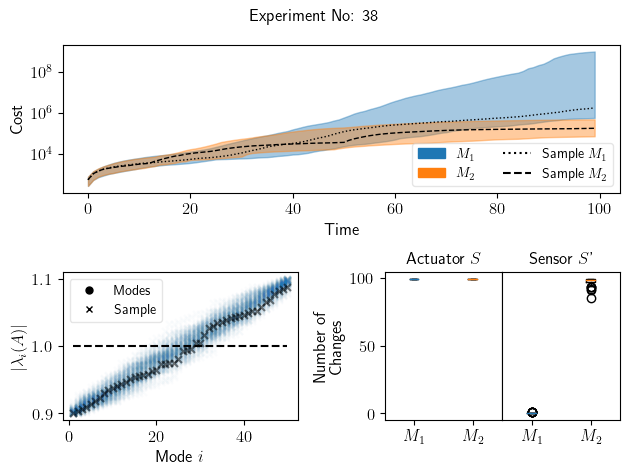

Code run done


In [6]:
print('Code run start')
exp_no = 38

# ff.simulate_experiment(exp_no) # This overwrites any pre-generated model data and may time to run! Comment out if only plotting

ff.plot_experiment(exp_no)

print('Code run done')